In [7]:
import os
os.getcwd()

'C:\\Users\\deven\\Desktop\\walmart project'

In [9]:
import pandas as pd

In [72]:
import plotly.express as px
import plotly.graph_objects as go


In [74]:
da=pd.read_csv('ecom.csv',encoding = 'latin-1')
# latin-1 -- to read the special char in data set

In [76]:
da.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [92]:
da.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Converting date columns

In [90]:
# object to date format
da['Order Date']= pd.to_datetime(da['Order Date'],format='mixed')


In [161]:
da['Ship Date'] = pd.to_datetime(da['Ship Date'], errors='coerce', dayfirst=True)
da['Ship Date']= pd.to_datetime(da['Ship Date'])
invalid_dates = da[da['Ship Date'].isna()]


In [96]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [153]:
da['Order Month']= da['Order Date'].dt.month
da['Order Year']= da['Order Date'].dt.year
da['Order day of week']= da['Order Date'].dt.dayofweek


# 1. Monthly sales analysis

In [139]:
sale_by_month=da.groupby('Order Month')['Sales'].sum().reset_index()

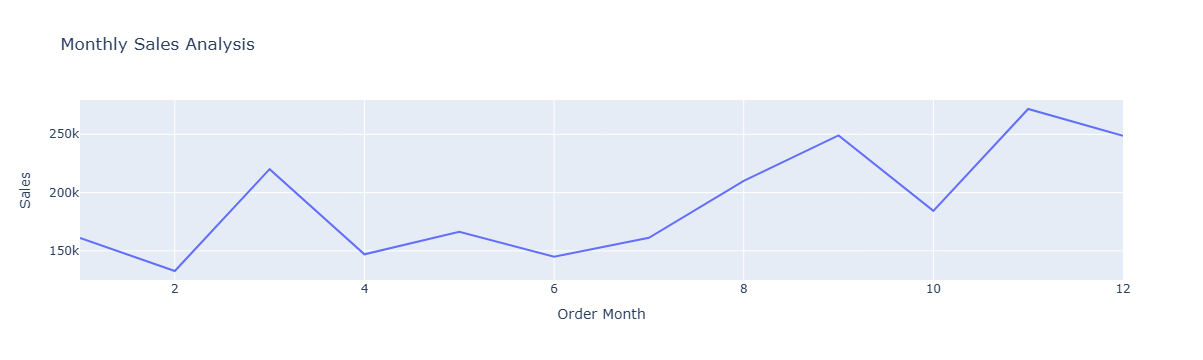

In [157]:
fig = px.line(sale_by_month, 
              x='Order Month', 
              y='Sales',
              title='Monthly Sales Analysis')
fig.show()

# 2. Yearly Sales Analysis

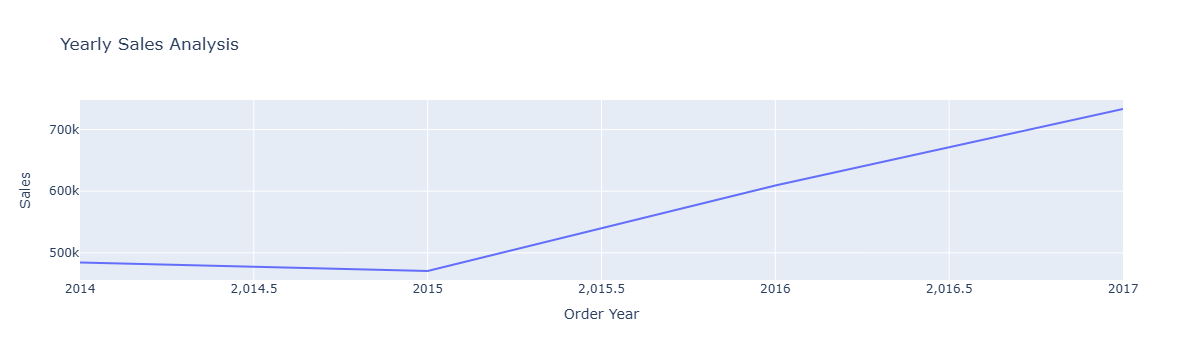

In [159]:
sale_by_year=da.groupby('Order Year')['Sales'].sum().reset_index()
fig = px.line(sale_by_year, x='Order Year', y='Sales',title='Yearly Sales Analysis')

fig.show()

In [163]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   int64         
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   object        
 14  Category

# 3. Region Wise Profit Analysis

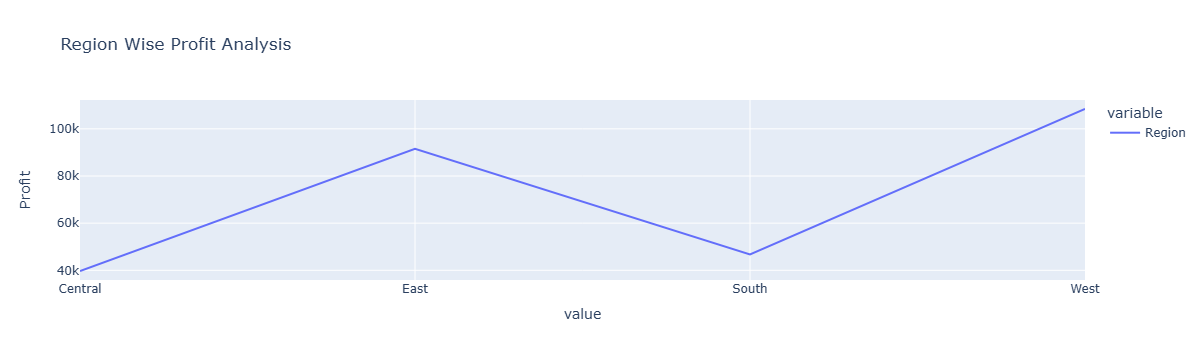

In [202]:
group_da= da.groupby(['Region'])['Profit'].sum().reset_index()
fig = px.line(group_da, x=['Region'], y='Profit',title='Region Wise Profit Analysis')

fig.show()

# 4. Region Wise Sales Analysis

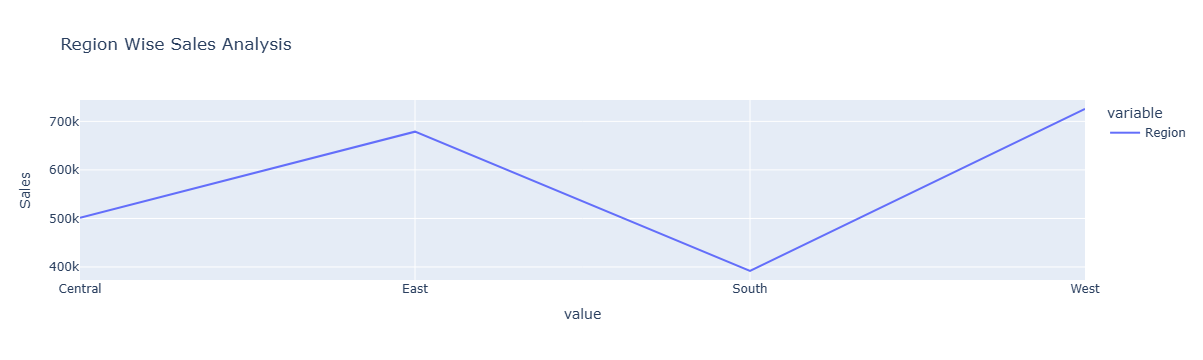

In [350]:
group_da= da.groupby(['Region'])['Sales'].sum().reset_index()
fig = px.line(group_da, x=['Region'], y='Sales',title='Region Wise Sales Analysis')

fig.show()

# 5. Product Wise Sales Analysis

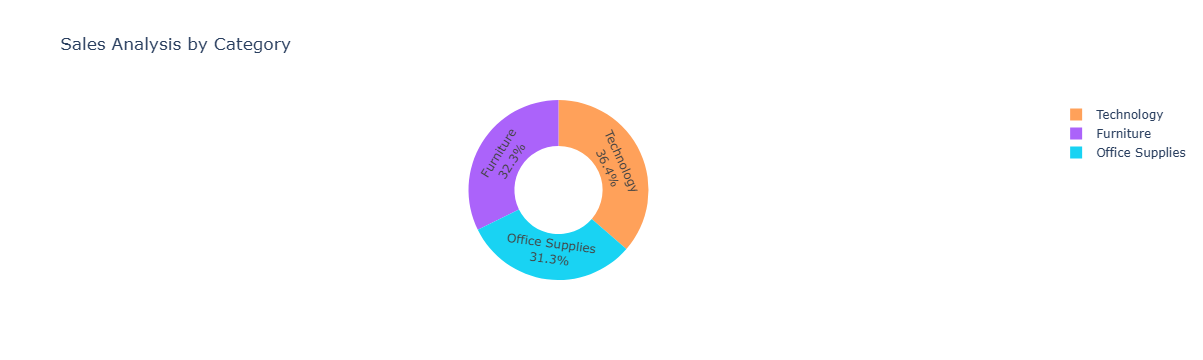

In [253]:
group_cat= da.groupby(['Category'])['Sales'].sum().reset_index()
fig2 = px.pie(group_cat, names='Category', values='Sales',title='Product Wise Sales Analysis',hole=0.49, color_discrete_sequence=['#FFA15A', '#AB63FA', '#19D3F3'])
fig2.update_layout(title='Sales Analysis by Category')
fig2.update_traces(textposition='inside',textinfo='percent+label')
fig2.show()

# 6. Sales Analysis by Sub Category

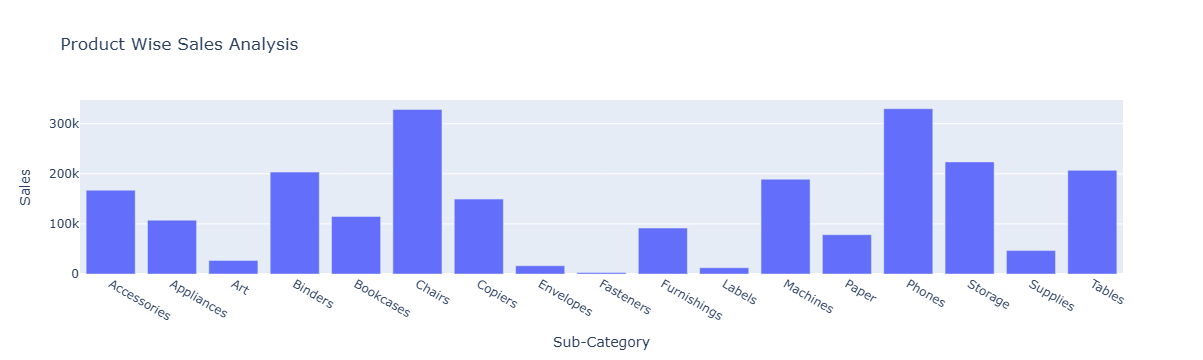

In [267]:
sub_cat_sales= da.groupby('Sub-Category')['Sales'].sum().reset_index()
fig3=px.bar(sub_cat_sales,x='Sub-Category',y='Sales',title='Product Wise Sales Analysis')
# fig3.update_traces(textposition='inside',textinfo='percent+label')
fig3.show()

# 7. Sales and Profit analysis by Customer Segment

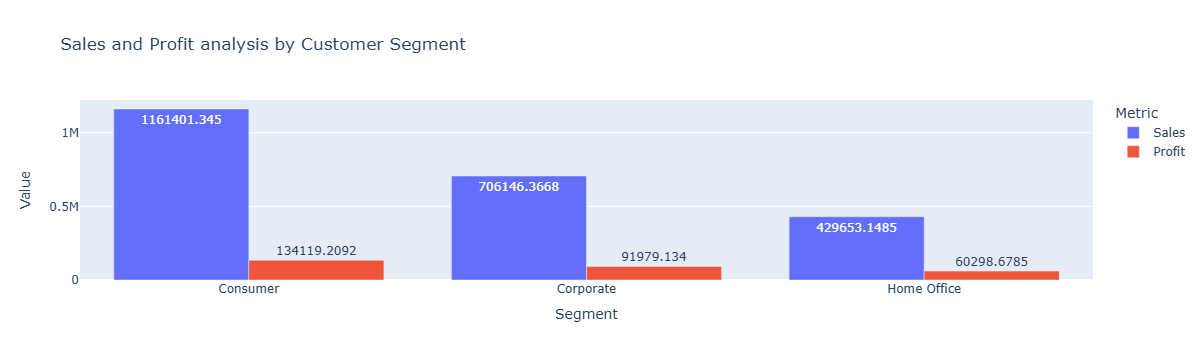

In [292]:
group_data = da.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
df_melted = group_data.melt(id_vars='Segment', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')
# Plotly needs the data in a "long" format for grouped bar charts
fig4 = px.bar(
    df_melted,
    x='Segment',
    y='Value',
    color='Metric',
    barmode='group',
    title='Sales and Profit analysis by Customer Segment',
    text='Value'
)

fig4.show()


# 8. Monthly Profit Analysis

In [297]:
monthly_profit=da.groupby('Order Month')['Profit'].sum().reset_index()

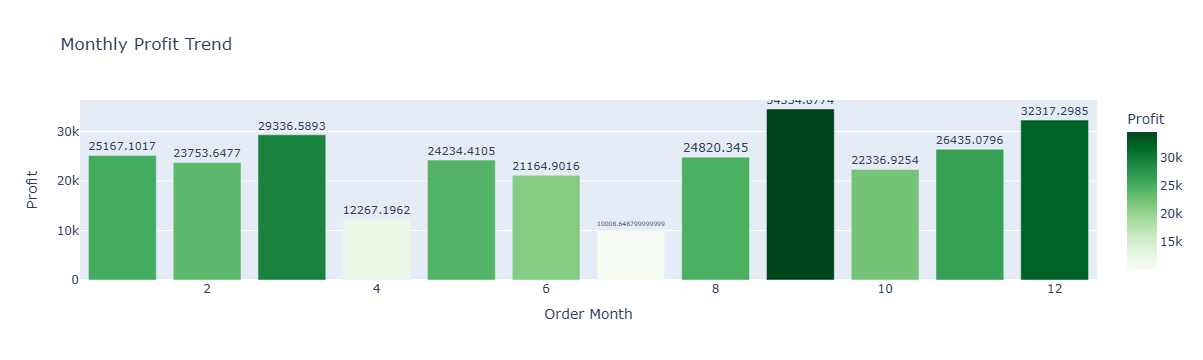

In [329]:
fig5=px.bar(monthly_profit,x='Order Month',y='Profit',title='Monthly Profit Trend',text='Profit',color='Profit',  # Adds color based on Profit values
    color_continuous_scale='Greens')
fig5.update_traces(textposition='outside')
fig5.show()

# 9. Sales to Profit Ratio

In [340]:
sales_to_profit=da.groupby('Segment')[['Profit','Sales']].sum().reset_index()
sales_to_profit

,Segment,Profit,Sales
0,Consumer,134119.2092,1.161401e+06
1,Corporate,91979.1340,7.061464e+05
2,Home Office,60298.6785,4.296531e+05


In [358]:
sales_to_profit['Sales_to_Profit_Ratio']= sales_to_profit['Sales']/sales_to_profit['Profit']
sales_to_profit[['Segment','Sales_to_Profit_Ratio']]

,Segment,Sales_to_Profit_Ratio
0,Consumer,8.659471
1,Corporate,7.677245
2,Home Office,7.125416
